In [12]:
import numpy as np
import matplotlib.pyplot as plt

import sys

if '..' not in sys.path:
    sys.path.append('..')

from data import OneBall2DFreeFallPredictionFromInitialStateWithDiameterDataset

import torch
from torch import nn
from torch.utils.data import DataLoader
from torch.nn.functional import mse_loss as mse_pytorch

import reservoirpy as rpy
from reservoirpy.observables import mse as mse_esn

from itertools import product
from tqdm.notebook import tqdm_notebook

from models import VanilaRNN, GRU, LSTM, ESN, SeqESN, ParallelESN, GroupedESN

rpy.verbosity(0)

0

# Importing data

In [2]:
batch_size = 32

train_data, test_data = OneBall2DFreeFallPredictionFromInitialStateWithDiameterDataset.train_test_split('../data/raw/single-ball-2d-free-fall-initial-with-diameter', test_frac=0.2)

train_dataloader = DataLoader(dataset=train_data, batch_size=batch_size)
test_dataloader = DataLoader(dataset=test_data, batch_size=batch_size)

Test size:  10562
train_test_split response: test fraction rounded to 0.19998485250123074 (10562 simulations)


# Training and testing the models

## Vanila RNN

### Without ReLU

VanilaRNN(
  (rnn): RNN(3, 64, batch_first=True)
  (out): Linear(in_features=64, out_features=48, bias=True)
)
Unsuccessful start. Loss: 44.2681167148985
Unsuccessful start. Loss: 48.4554315188725
Unsuccessful start. Loss: 30.90633169474313
Unsuccessful start. Loss: 35.39206053991802
Unsuccessful start. Loss: 53.74385942617664
Unsuccessful start. Loss: 60.86976225004764
Epoch 0 complete. Training loss: 14.171788506093435
Epoch 1 complete. Training loss: 0.9469702369824518
Epoch 2 complete. Training loss: 0.6601893565675709
Epoch 3 complete. Training loss: 0.6004997352138162
Epoch 4 complete. Training loss: 0.5766008033970138
Epoch 5 complete. Training loss: 0.5628975561412517
Epoch 6 complete. Training loss: 0.5535132551303832
Epoch 7 complete. Training loss: 0.5464654475072166
Epoch 8 complete. Training loss: 0.5408927260432392
Epoch 9 complete. Training loss: 0.5363506186113227
Epoch 10 complete. Training loss: 0.5325778056139825
Epoch 11 complete. Training loss: 0.5294041546731023
E

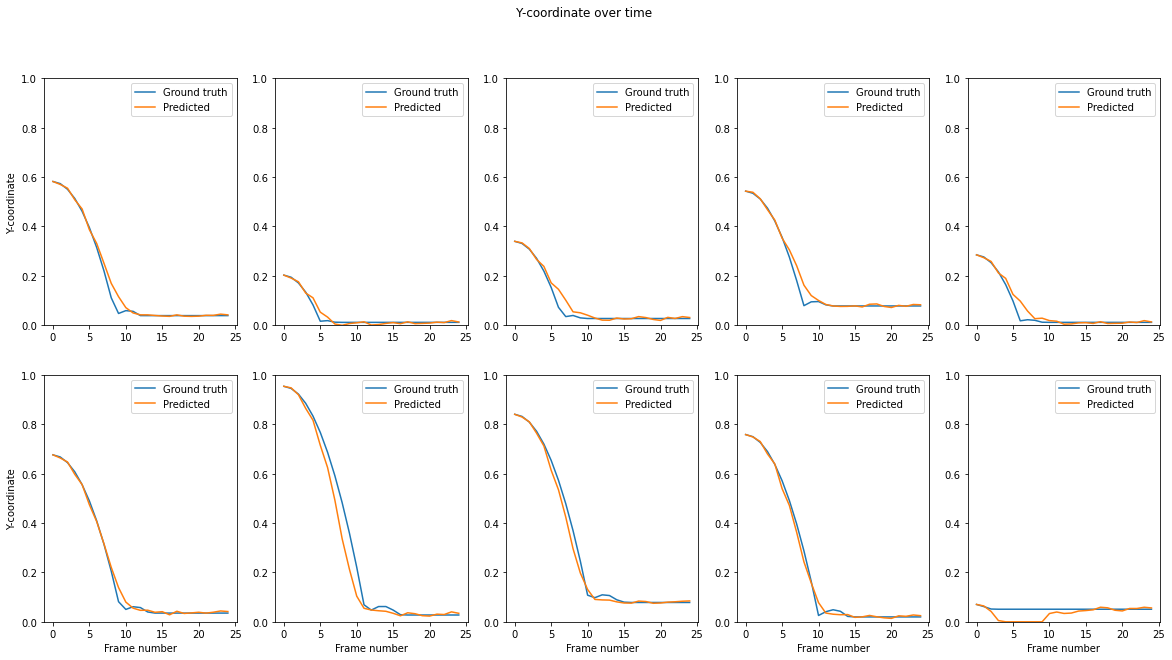

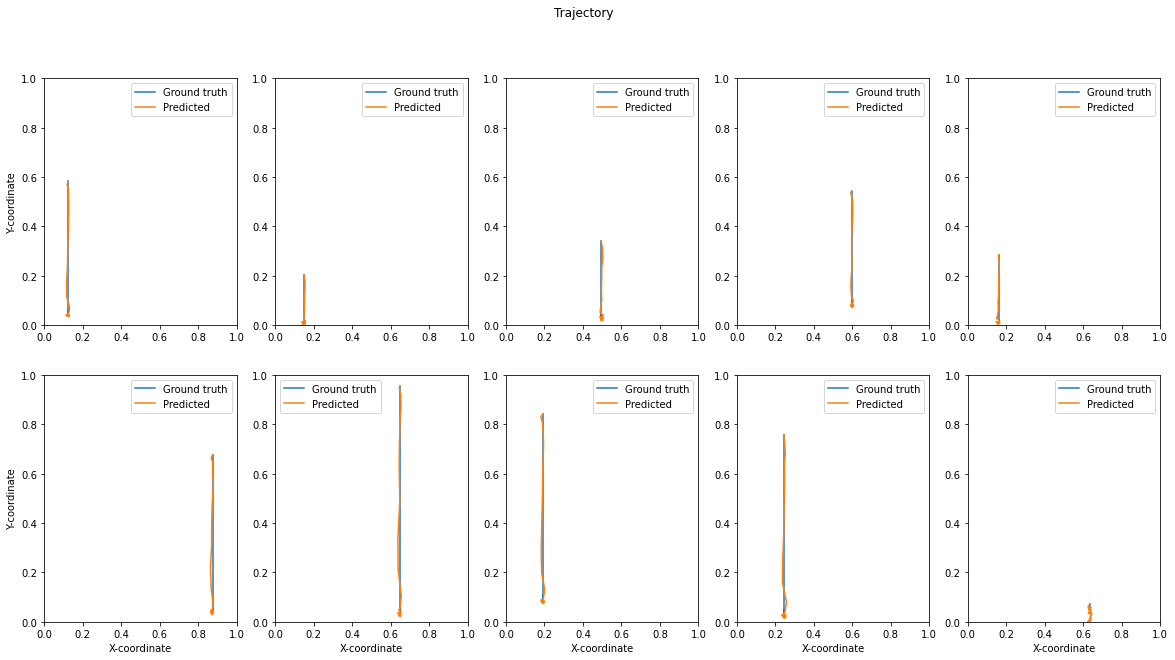

tensor(0.0182, grad_fn=<PowBackward0>)

In [3]:
vanila_rnn = VanilaRNN.train_model(train_dataloader=train_dataloader, input_dim=3, hidden_dim=64, num_rnns=1, output_dim=48, dropout_prob=0)
VanilaRNN.calculate_loss(vanila_rnn, mse_pytorch, test_dataloader, test_data, visualize_first_10_trajectories=True)

### With ReLU

VanilaRNN(
  (rnn): RNN(3, 64, batch_first=True)
  (out): Linear(in_features=64, out_features=48, bias=True)
  (relu): ReLU()
)
Unsuccessful start. Loss: 66.73500596173108
Unsuccessful start. Loss: 69.39660363271832
Unsuccessful start. Loss: 77.86279465258121
Unsuccessful start. Loss: 65.57259608991444
Unsuccessful start. Loss: 98.6814437508583
Unsuccessful start. Loss: 84.82519003376365
Unsuccessful start. Loss: 64.55112030357122
Epoch 0 complete. Training loss: 35.64279949758202
Epoch 1 complete. Training loss: 28.22920926194638
Epoch 2 complete. Training loss: 22.03134993556887
Epoch 3 complete. Training loss: 21.98206061962992
Epoch 4 complete. Training loss: 21.970139636658132
Epoch 5 complete. Training loss: 21.963234185241163
Epoch 6 complete. Training loss: 21.958503993228078
Epoch 7 complete. Training loss: 21.946584169752896
Epoch 8 complete. Training loss: 21.855520284734666
Epoch 9 complete. Training loss: 21.84094873163849
Epoch 10 complete. Training loss: 21.8402707306668

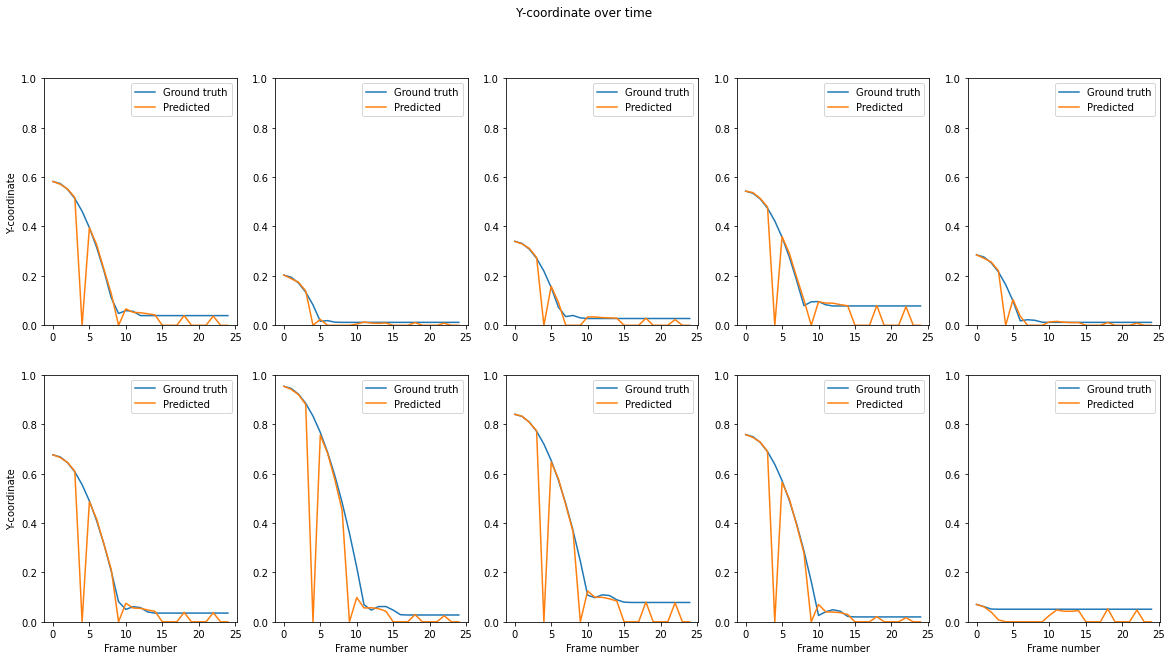

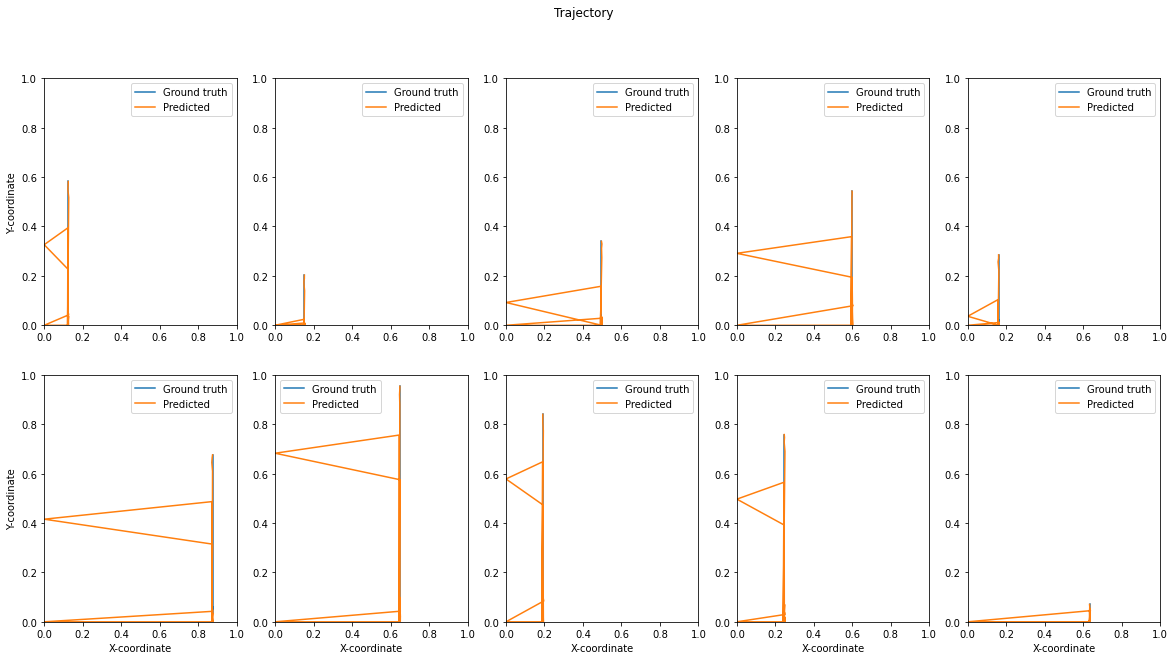

tensor(0.1280, grad_fn=<PowBackward0>)

In [4]:
vanila_rnn_relu = VanilaRNN.train_model(train_dataloader=train_dataloader, error_threshold=50, input_dim=3, hidden_dim=64, num_rnns=1, output_dim=48, dropout_prob=0, relu=True)
VanilaRNN.calculate_loss(vanila_rnn_relu, mse_pytorch, test_dataloader, test_data, visualize_first_10_trajectories=True)

## GRU

### Without ReLU

GRU(
  (gru): GRU(3, 64, batch_first=True)
  (out): Linear(in_features=64, out_features=48, bias=True)
)
Unsuccessful start. Loss: 15.678813891485333
Epoch 0 complete. Training loss: 13.97047983831726
Epoch 1 complete. Training loss: 2.654156568052713
Epoch 2 complete. Training loss: 1.3258873781887814
Epoch 3 complete. Training loss: 0.8820543533365708
Epoch 4 complete. Training loss: 0.7150270316633396
Epoch 5 complete. Training loss: 0.6444244011072442
Epoch 6 complete. Training loss: 0.6100072328408714
Epoch 7 complete. Training loss: 0.5903454711951781
Epoch 8 complete. Training loss: 0.5773106552369427
Epoch 9 complete. Training loss: 0.5675985541311093
Epoch 10 complete. Training loss: 0.5597584710048977
Epoch 11 complete. Training loss: 0.5530956576985773
Epoch 12 complete. Training loss: 0.5472454226401169
Epoch 13 complete. Training loss: 0.5419978207210079
Epoch 14 complete. Training loss: 0.5372214787057601
Epoch 15 complete. Training loss: 0.532827875285875
Epoch 16 comple

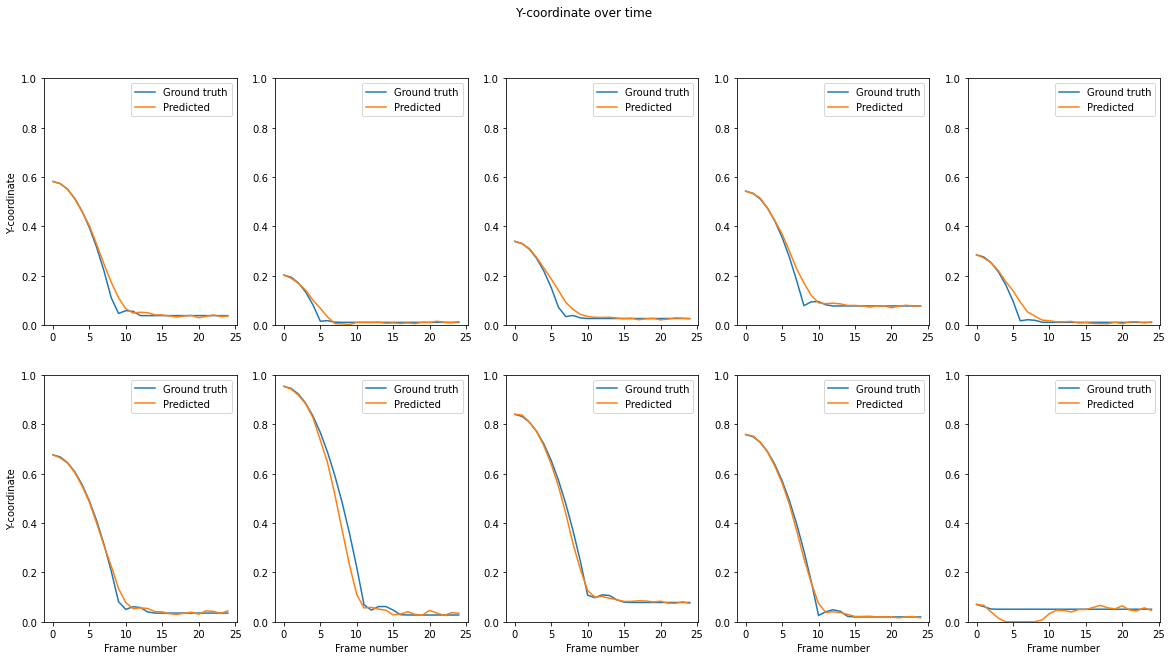

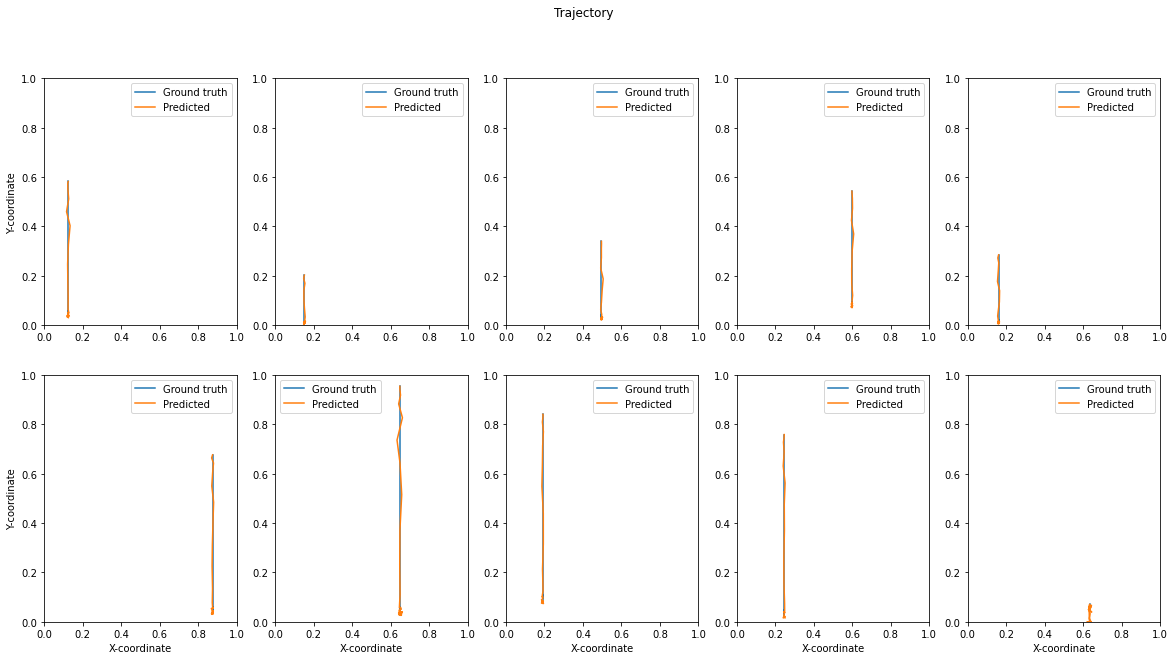

tensor(0.0160, grad_fn=<PowBackward0>)

In [5]:
gru = GRU.train_model(train_dataloader=train_dataloader, input_dim=3, hidden_dim=64, num_rnns=1, output_dim=48, dropout_prob=0)
GRU.calculate_loss(gru, mse_pytorch, test_dataloader, test_data, visualize_first_10_trajectories=True)

### With ReLU

In [ ]:
gru_relu = GRU.train_model(train_dataloader=train_dataloader, input_dim=3, hidden_dim=64, num_rnns=1, output_dim=48, dropout_prob=0, relu=True)
GRU.calculate_loss(gru_relu, mse_pytorch, test_dataloader, test_data, visualize_first_10_trajectories=True)

## LSTM

### Without ReLU

LSTM(
  (lstm): LSTM(3, 64, batch_first=True)
  (out): Linear(in_features=64, out_features=48, bias=True)
)
Unsuccessful start. Loss: 26.042000119108707
Unsuccessful start. Loss: 29.022346488200128
Unsuccessful start. Loss: 26.467846943531185
Unsuccessful start. Loss: 27.225790731608868
Unsuccessful start. Loss: 29.446567070204765
Unsuccessful start. Loss: 28.779530240688473
Unsuccessful start. Loss: 29.20584891550243
Unsuccessful start. Loss: 27.505546967498958
Unsuccessful start. Loss: 27.389646495692432
Unsuccessful start. Loss: 31.087913538329303
Unsuccessful start. Loss: 28.00170685676858
Unsuccessful start. Loss: 28.898252152837813
Unsuccessful start. Loss: 29.133498943410814
Unsuccessful start. Loss: 29.332044650800526
Unsuccessful start. Loss: 26.3863603672944
Epoch 0 complete. Training loss: 24.45155620854348
Epoch 1 complete. Training loss: 6.812920052092522
Epoch 2 complete. Training loss: 4.028091807384044
Epoch 3 complete. Training loss: 2.636323441634886
Epoch 4 complete.

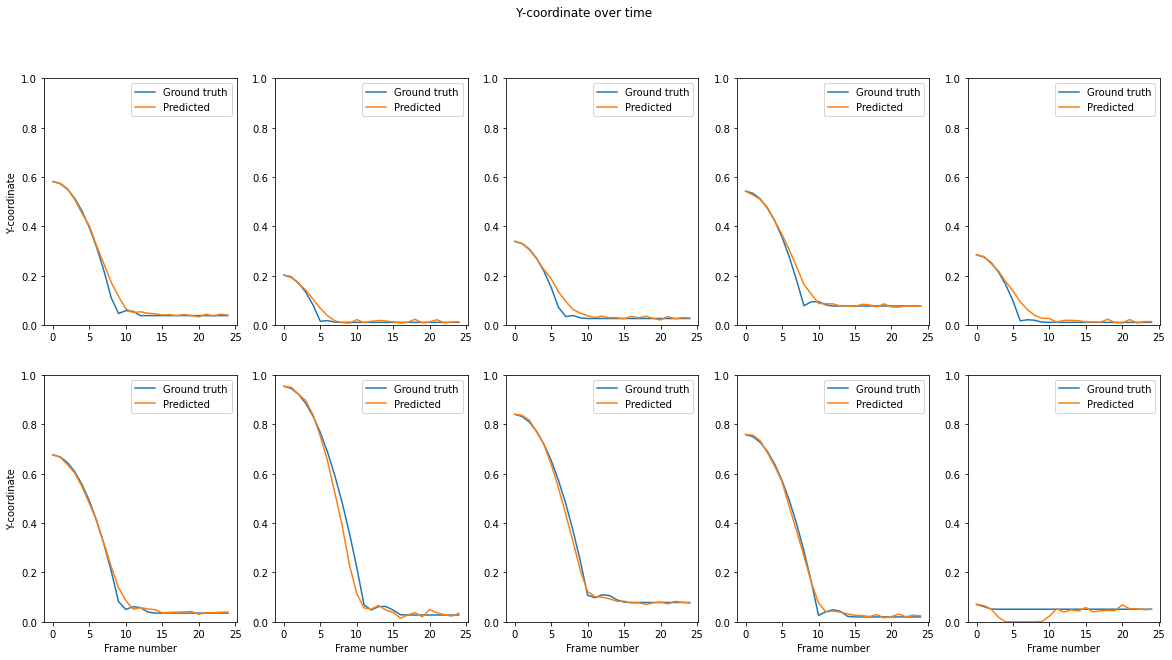

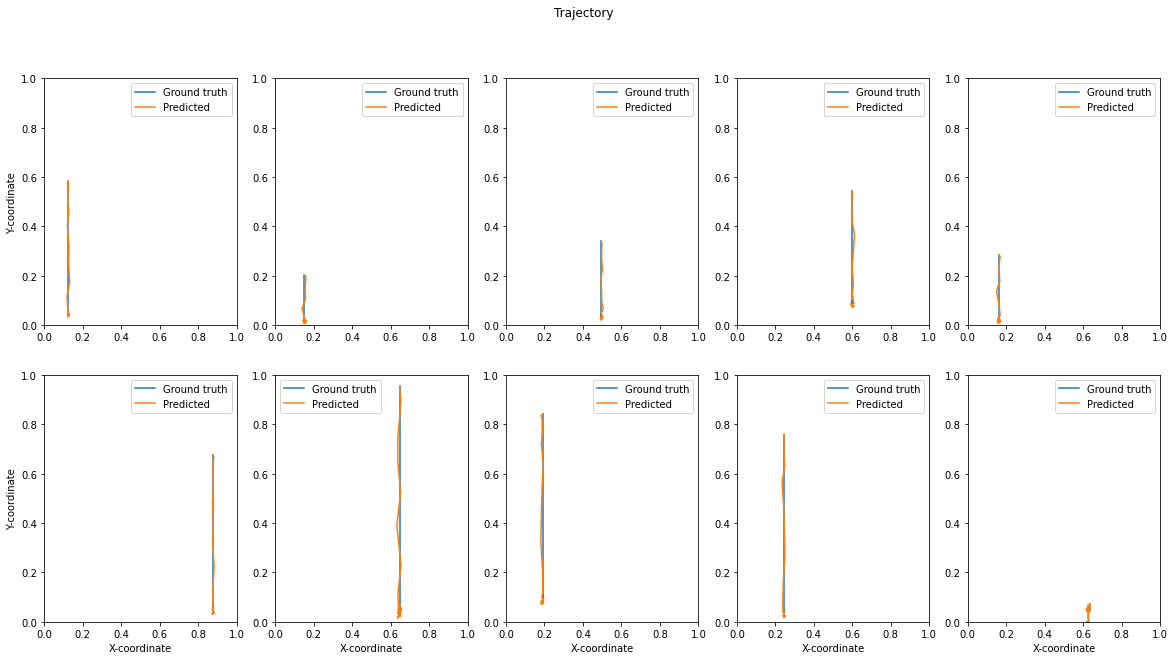

tensor(0.0164, grad_fn=<PowBackward0>)

In [6]:
lstm = LSTM.train_model(train_dataloader=train_dataloader, error_threshold=25, input_dim=3, hidden_dim=64, num_rnns=1, output_dim=48, dropout_prob=0)
LSTM.calculate_loss(lstm, mse_pytorch, test_dataloader, test_data, visualize_first_10_trajectories=True)

### With ReLU

In [ ]:
lstm_relu = LSTM.train_model(train_dataloader=train_dataloader, input_dim=3, hidden_dim=64, num_rnns=1, output_dim=48, dropout_prob=0, relu=True)
LSTM.calculate_loss(lstm_relu, mse_pytorch, test_dataloader, test_data, visualize_first_10_trajectories=True)

## ESN

'Model-0': Model('Reservoir-0', 'Ridge-0')
Test loss:  0.03195006914628058


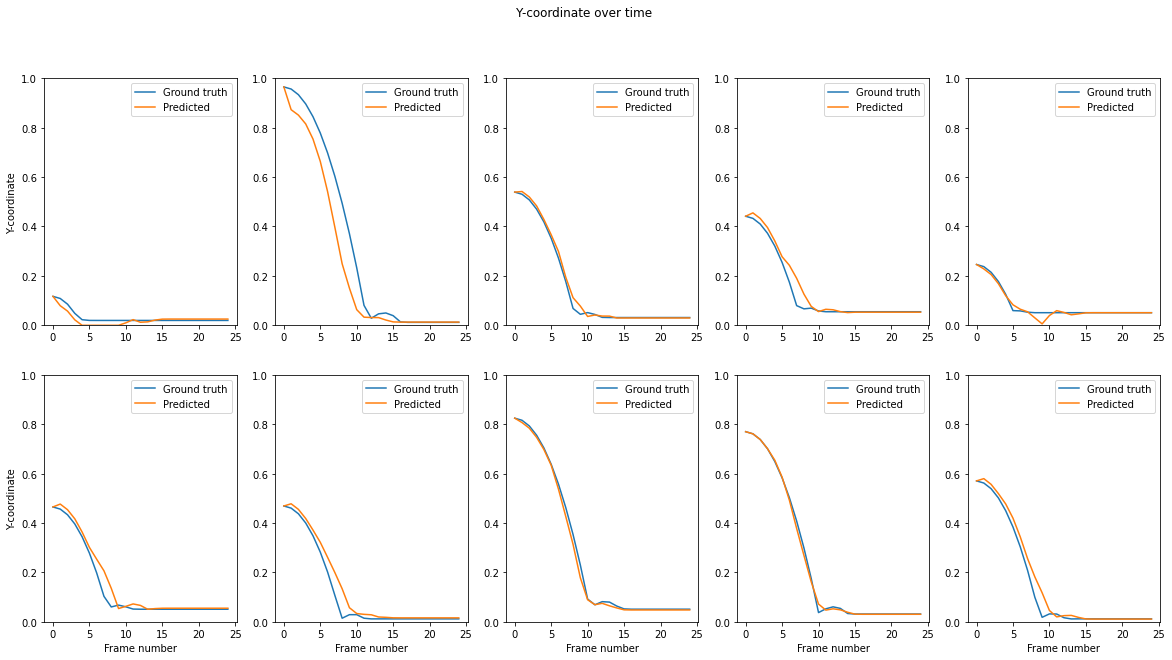

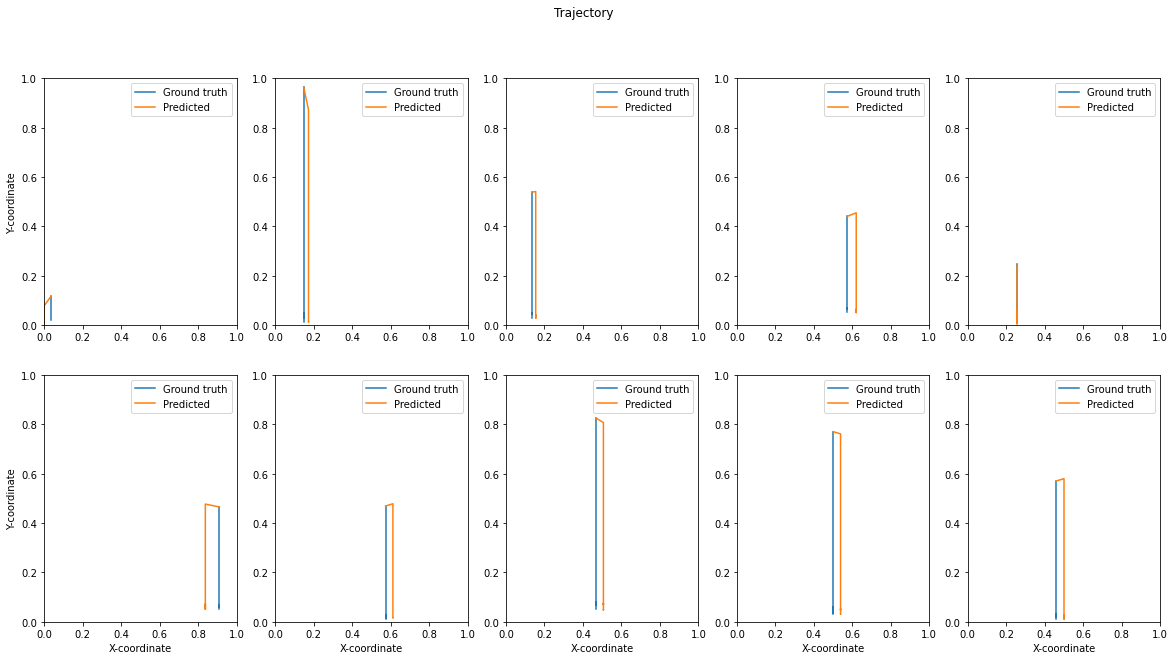

0.03195006914628058

In [3]:
rpy.set_seed(42)

esn = ESN.train_model(train_dataloader=train_dataloader, input_dim=3, reservoir_size=70, output_dim=48, leaking_rate=0.7, spectral_radius=0.95, ridge_param=0.01)
ESN.calculate_loss(esn, mse_esn, test_dataloader, test_data, visualize_first_10_trajectories=True)

## SeqESN

'Model-4': Model('Input-0', 'Reservoir-1', 'Ridge-1', 'Reservoir-2', 'Ridge-2')
Test loss:  0.041303681280779415


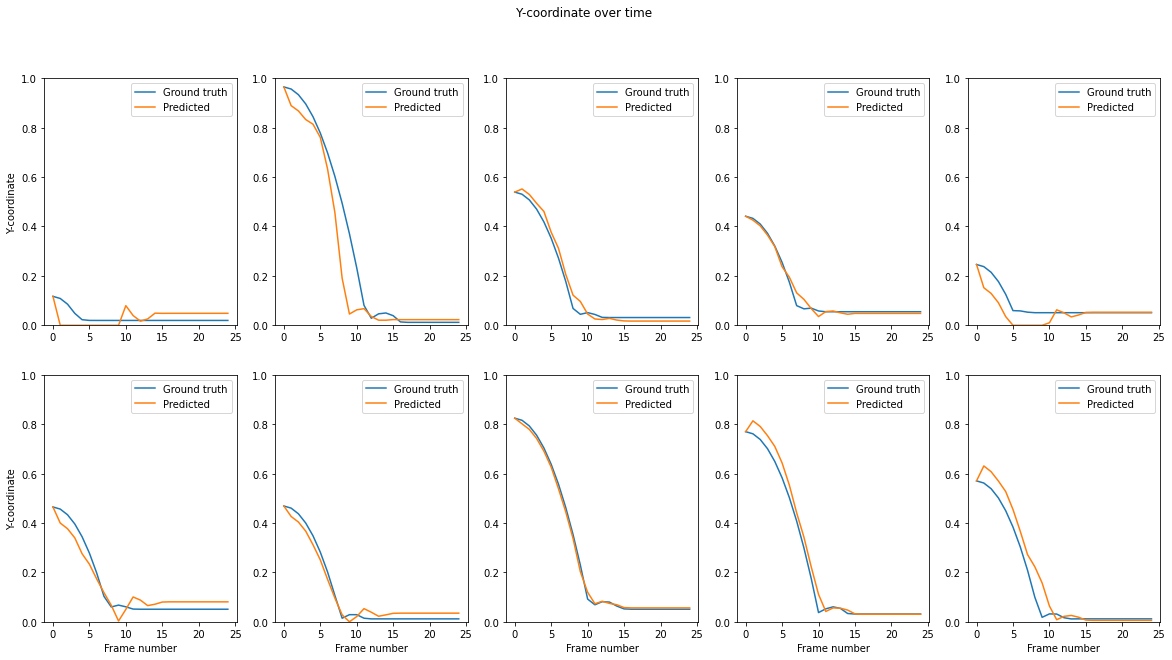

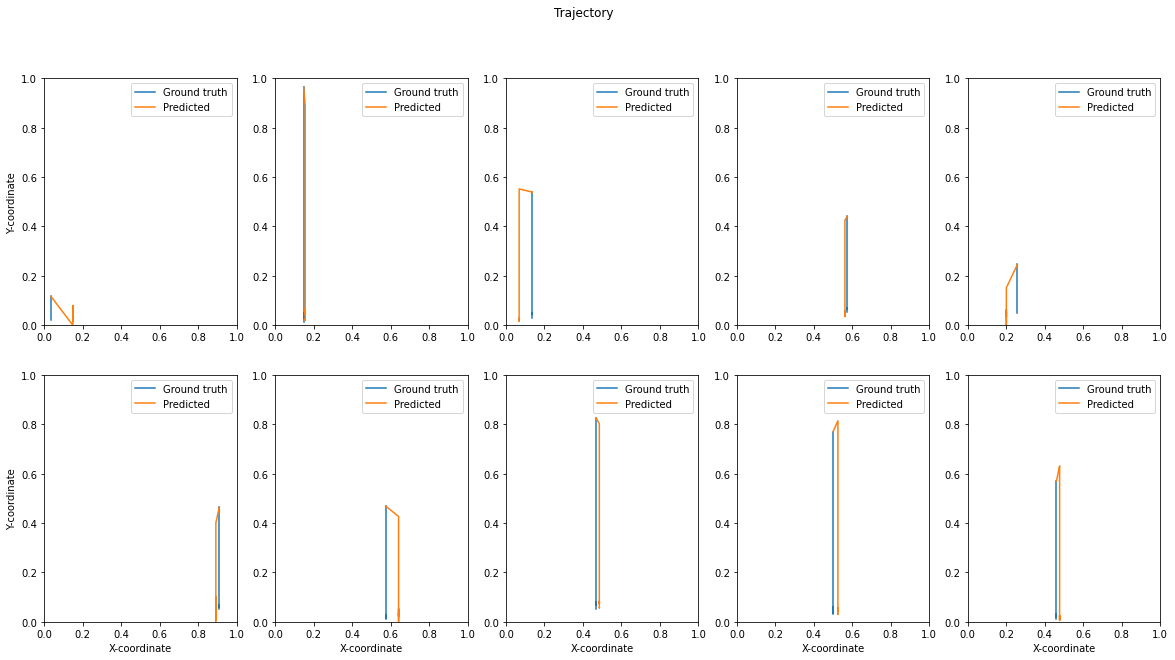

0.041303681280779415

In [4]:
rpy.set_seed(42)

seqesn = SeqESN.train_model(train_dataloader=train_dataloader, input_dim=3, reservoir_size=70, output_dim=48, leaking_rate=0.7, spectral_radius=0.95, ridge_param=0.01, number_of_reservoirs=2)
SeqESN.calculate_loss(seqesn, mse_esn, test_dataloader, test_data, visualize_first_10_trajectories=True)

## Parallel ESN

'Model-6': Model('Reservoir-4', 'Reservoir-3', 'Concat-0', 'Ridge-3')
Test loss:  0.031441883762736114


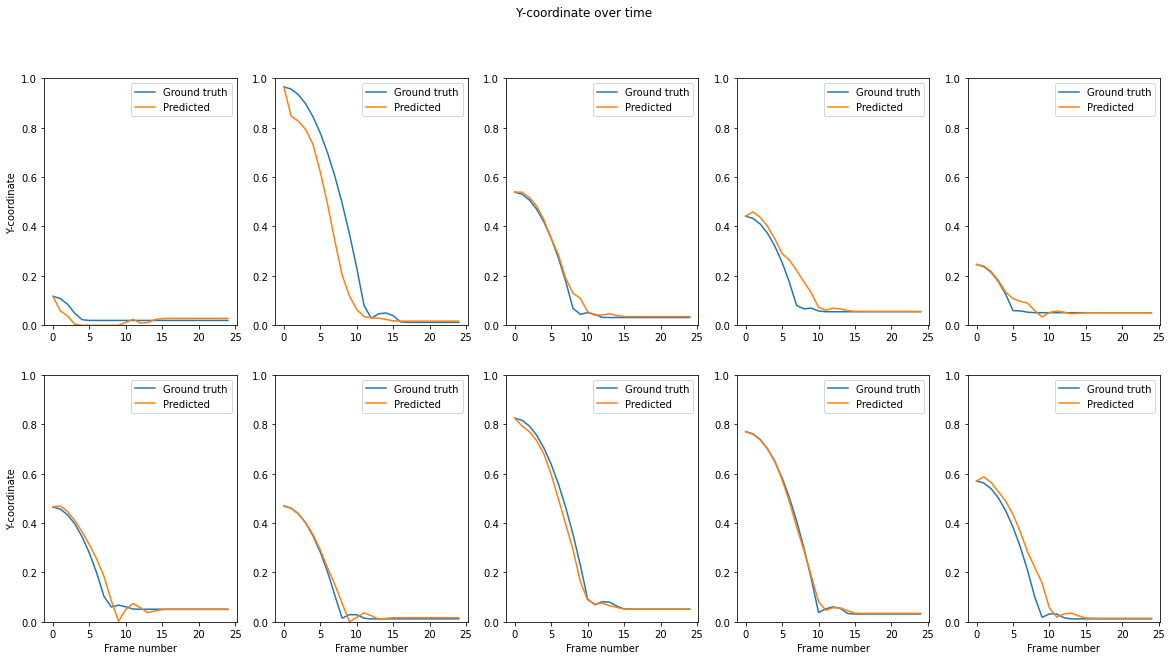

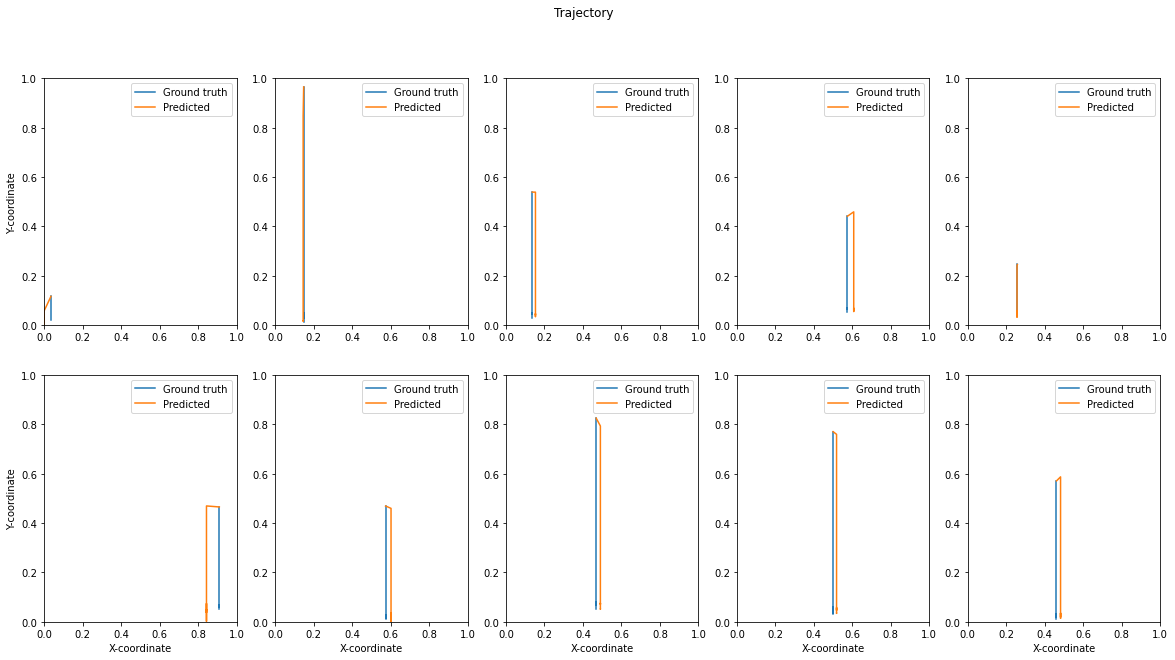

0.031441883762736114

In [5]:
rpy.set_seed(42)

parallel_esn = ParallelESN.train_model(train_dataloader=train_dataloader, input_dim=3, reservoir_size=70, output_dim=48, leaking_rate=0.7, spectral_radius=0.95, ridge_param=0.01, number_of_reservoirs=2)
ParallelESN.calculate_loss(parallel_esn, mse_esn, test_dataloader, test_data, visualize_first_10_trajectories=True)

'Model-10': Model('Reservoir-7', 'Reservoir-8', 'Reservoir-9', 'Concat-2', 'Ridge-5')
Test loss:  0.027971959993571518


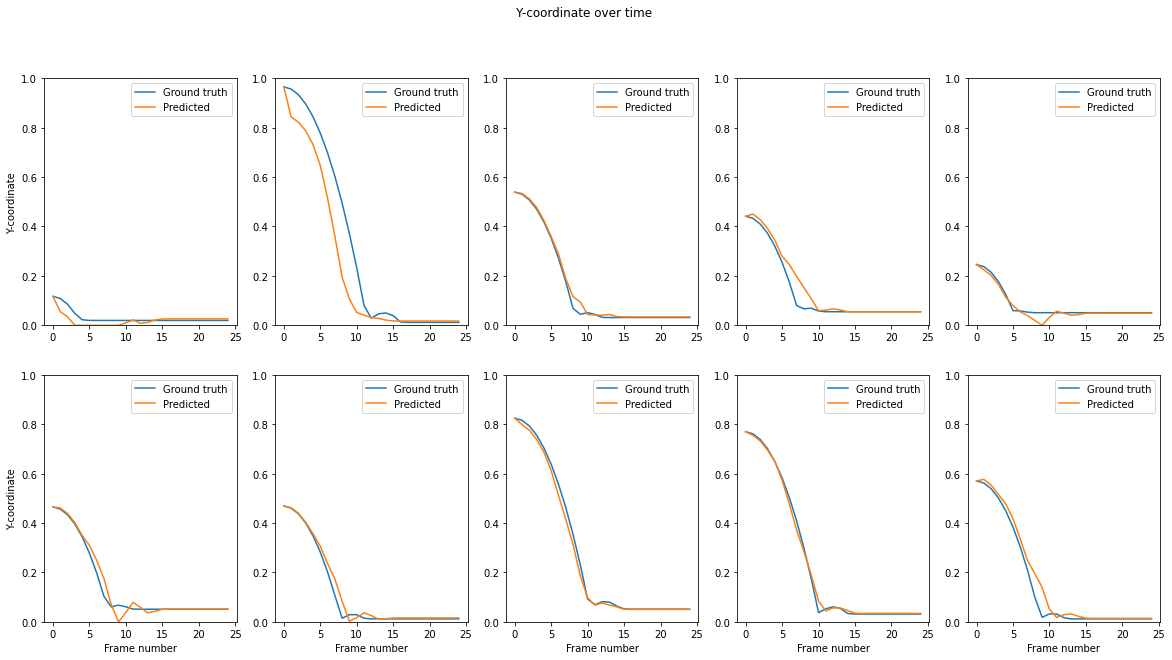

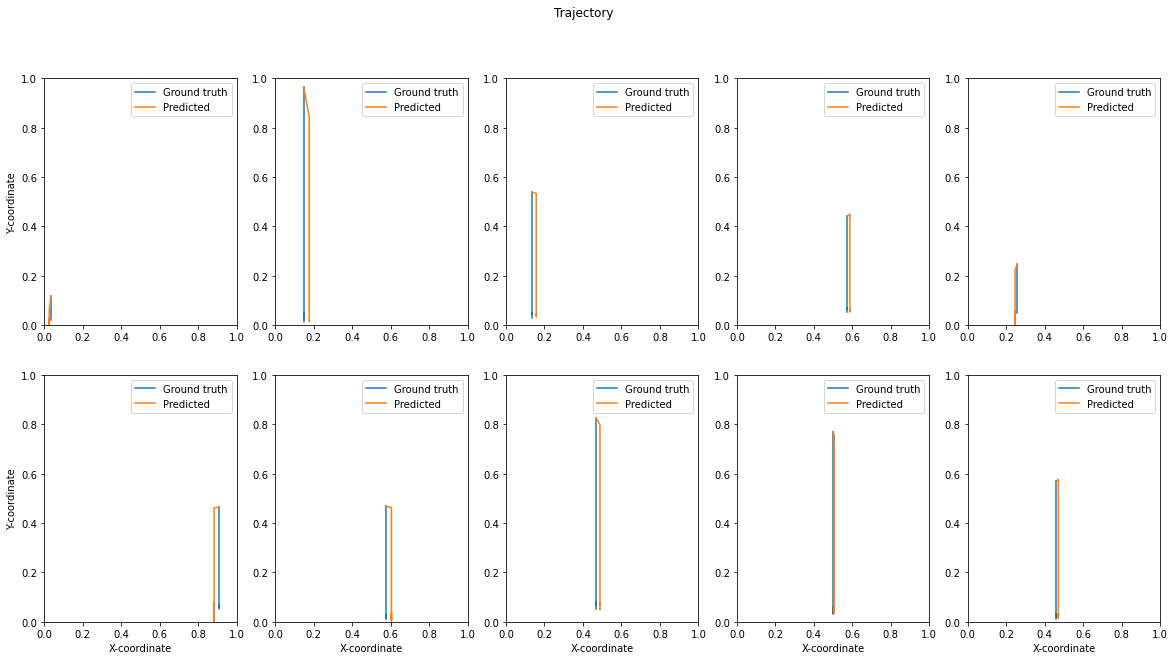

0.027971959993571518

In [7]:
rpy.set_seed(42)

parallel_esn_3_res = ParallelESN.train_model(train_dataloader=train_dataloader, input_dim=3, reservoir_size=70, output_dim=48, leaking_rate=0.7, spectral_radius=0.95, ridge_param=0.01, number_of_reservoirs=3)
ParallelESN.calculate_loss(parallel_esn_3_res, mse_esn, test_dataloader, test_data, visualize_first_10_trajectories=True)

'Model-15': Model('Reservoir-13', 'Reservoir-14', 'Reservoir-16', 'Reservoir-15', 'Concat-4', 'Ridge-7')
Test loss:  0.03042351986717459


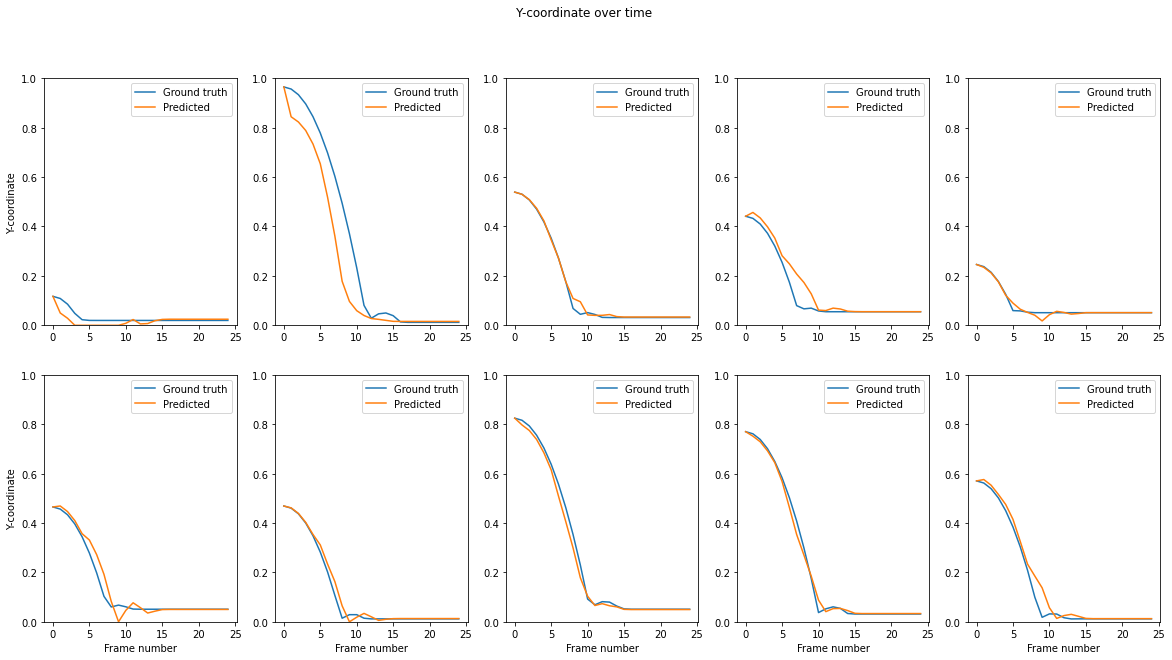

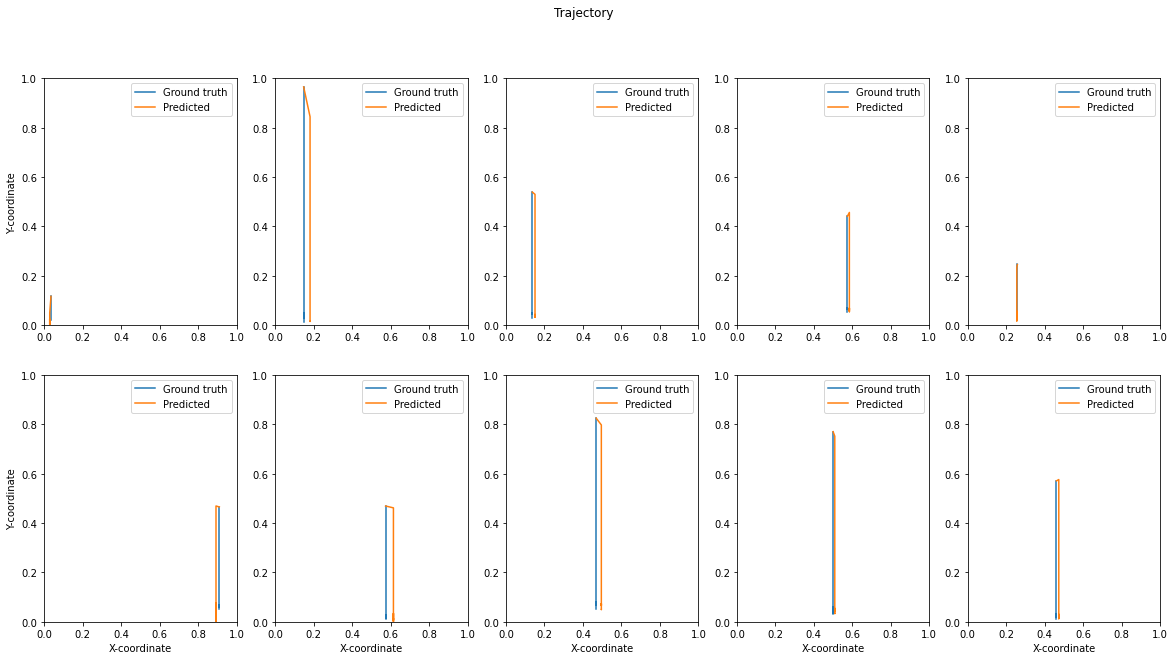

0.03042351986717459

In [9]:
rpy.set_seed(42)

parallel_esn_4_res = ParallelESN.train_model(train_dataloader=train_dataloader, input_dim=3, reservoir_size=70, output_dim=48, leaking_rate=0.7, spectral_radius=0.95, ridge_param=0.01, number_of_reservoirs=4)
ParallelESN.calculate_loss(parallel_esn_4_res, mse_esn, test_dataloader, test_data, visualize_first_10_trajectories=True)

'Model-20': Model('Reservoir-19', 'Reservoir-20', 'Reservoir-21', 'Reservoir-17', 'Reservoir-18', 'Concat-5', 'Ridge-8')
Test loss:  0.028392242534831656


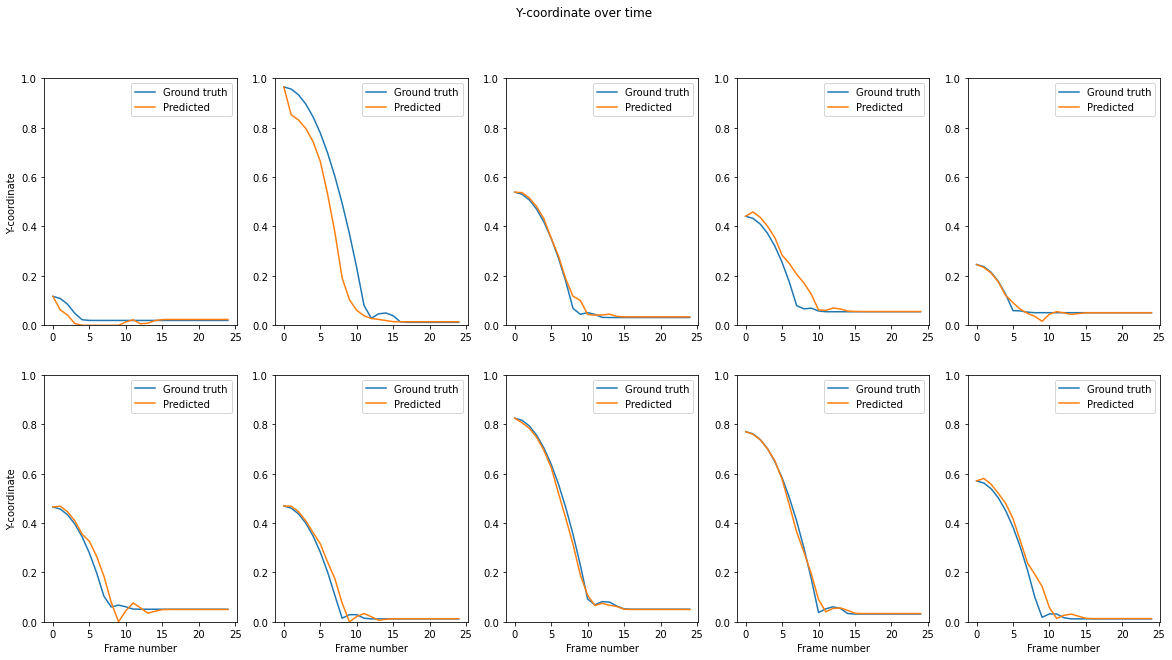

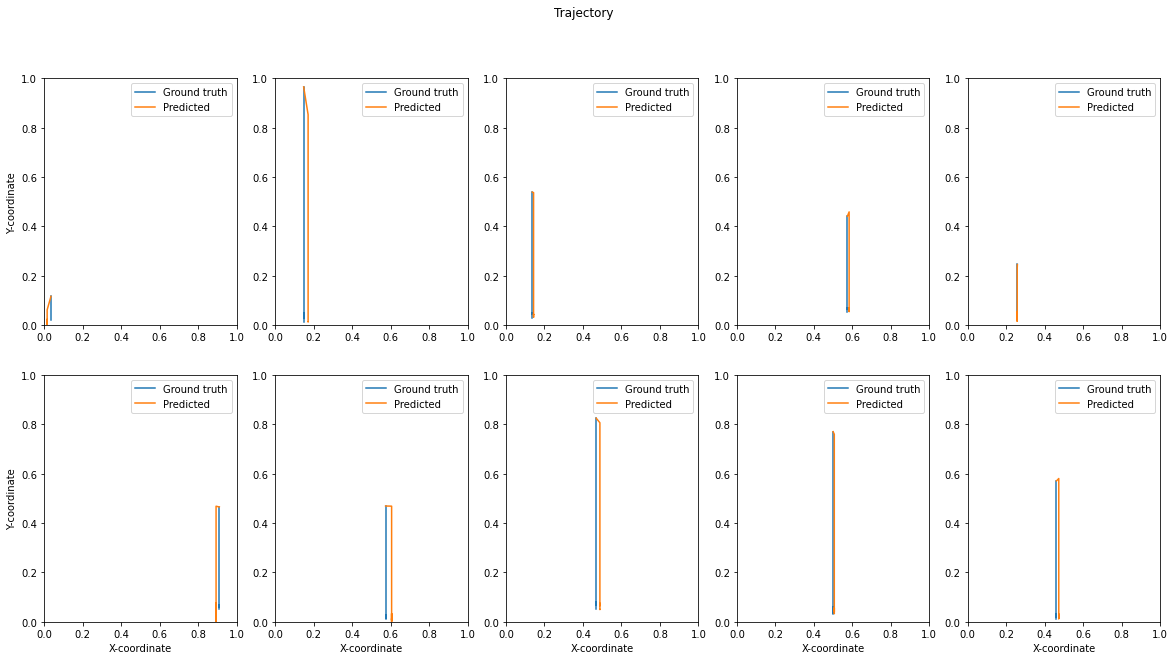

0.028392242534831656

In [10]:
rpy.set_seed(42)

parallel_esn_5_res = ParallelESN.train_model(train_dataloader=train_dataloader, input_dim=3, reservoir_size=70, output_dim=48, leaking_rate=0.7, spectral_radius=0.95, ridge_param=0.01, number_of_reservoirs=5)
ParallelESN.calculate_loss(parallel_esn_5_res, mse_esn, test_dataloader, test_data, visualize_first_10_trajectories=True)

'Model-26': Model('Reservoir-24', 'Reservoir-22', 'Reservoir-27', 'Reservoir-23', 'Reservoir-26', 'Reservoir-25', 'Concat-6', 'Ridge-9')
Test loss:  0.027618277908080555


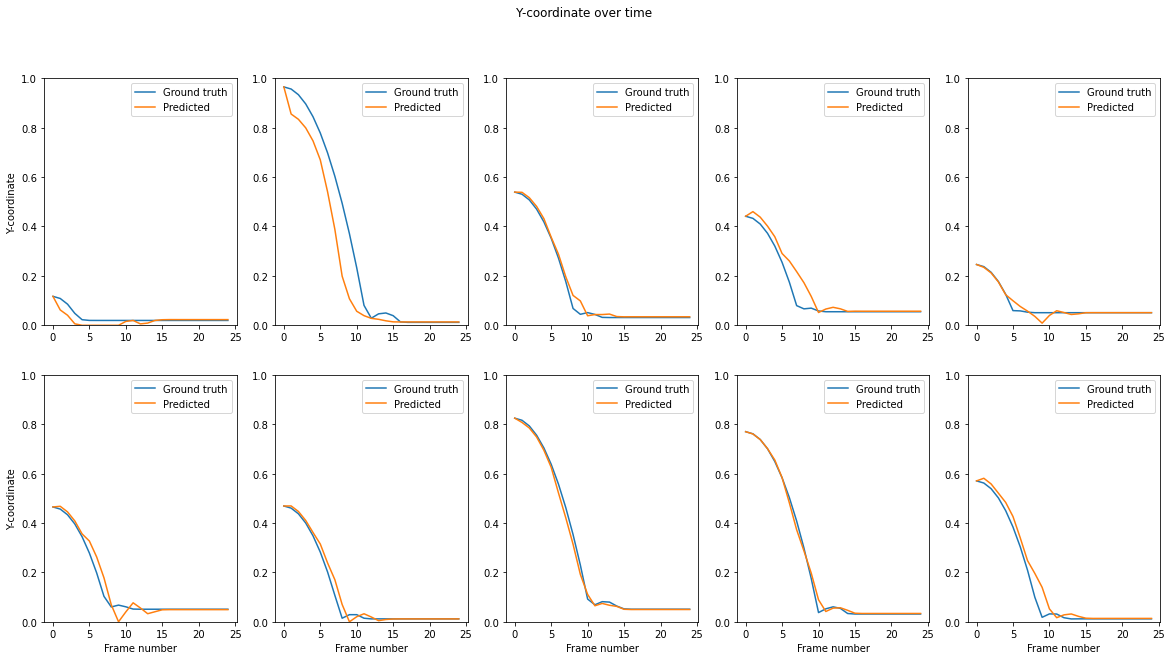

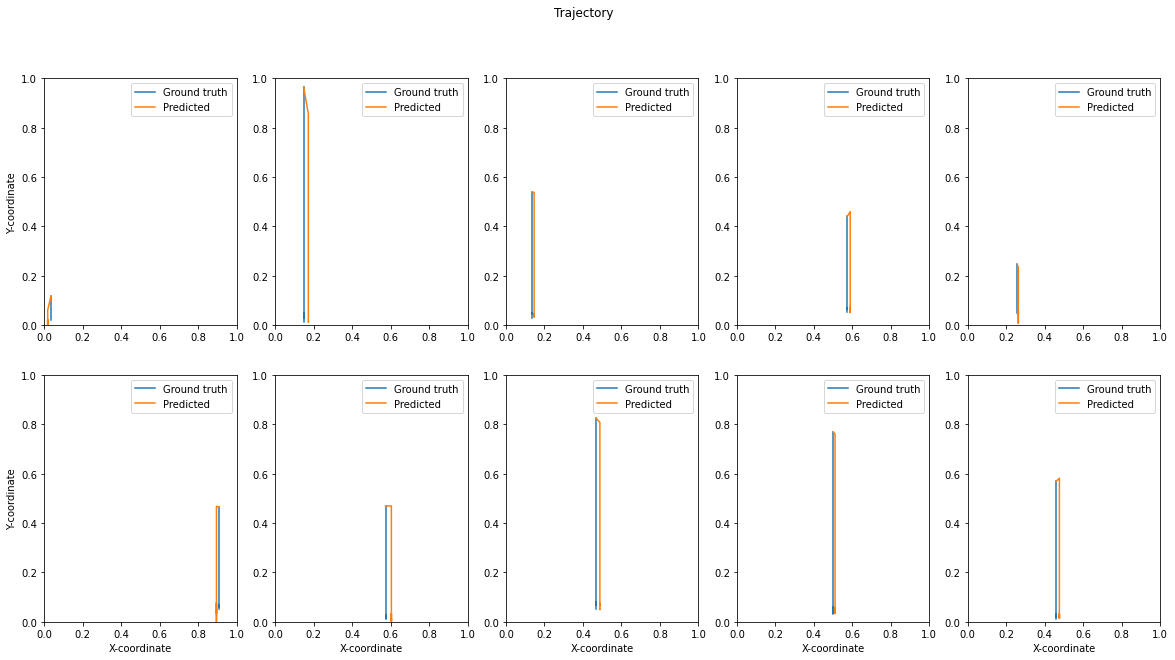

0.027618277908080555

In [11]:
rpy.set_seed(42)

parallel_esn_6_res = ParallelESN.train_model(train_dataloader=train_dataloader, input_dim=3, reservoir_size=70, output_dim=48, leaking_rate=0.7, spectral_radius=0.95, ridge_param=0.01, number_of_reservoirs=6)
ParallelESN.calculate_loss(parallel_esn_6_res, mse_esn, test_dataloader, test_data, visualize_first_10_trajectories=True)

## Grouped ESN

'Model-7': Model('Reservoir-6', 'Reservoir-5', 'Concat-1', 'Ridge-4')
Test loss:  0.031441883762736406


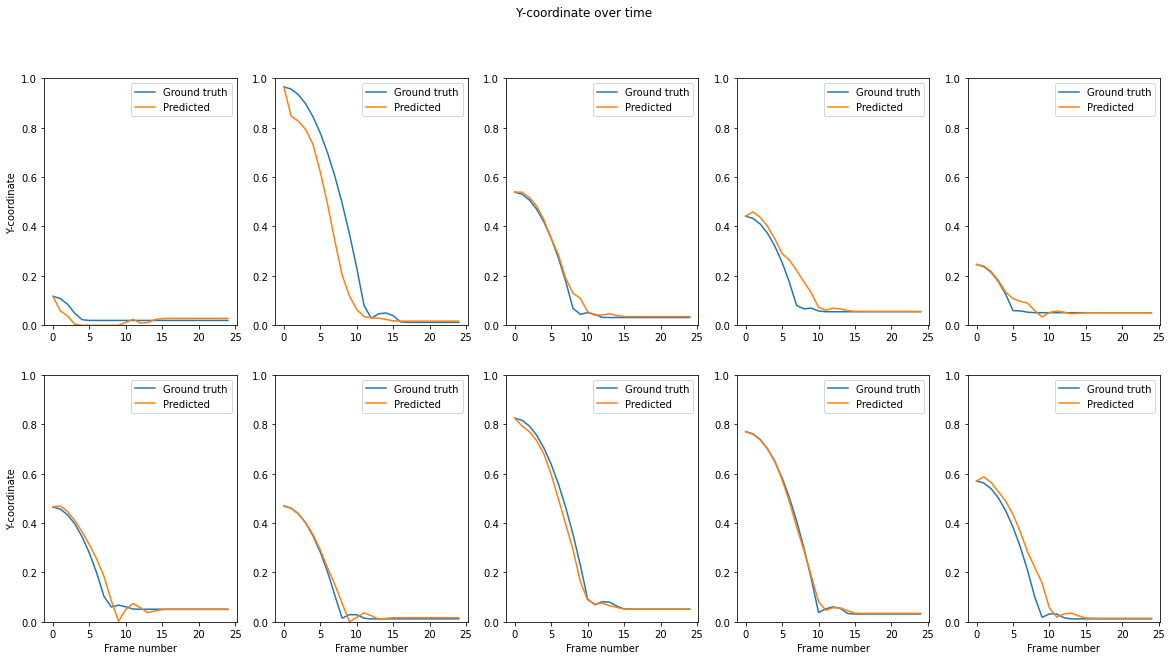

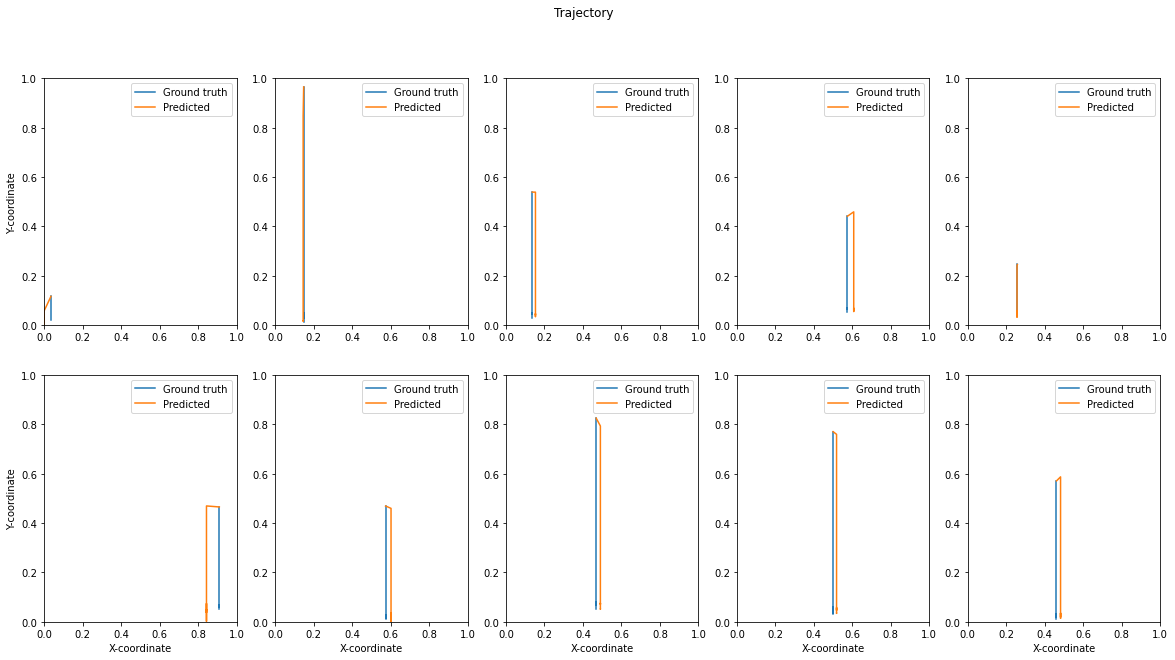

0.031441883762736406

In [6]:
rpy.set_seed(42)

grouped_esn = GroupedESN.train_model(train_dataloader=train_dataloader, input_dim=3, reservoir_size=70, output_dim=48, leaking_rate=0.7, spectral_radius=0.95, ridge_param=0.01, number_of_reservoirs=2)
GroupedESN.calculate_loss(grouped_esn, mse_esn, test_dataloader, test_data, visualize_first_10_trajectories=True)

'Model-11': Model('Reservoir-10', 'Reservoir-11', 'Reservoir-12', 'Concat-3', 'Ridge-6')
Test loss:  0.027971959993572222


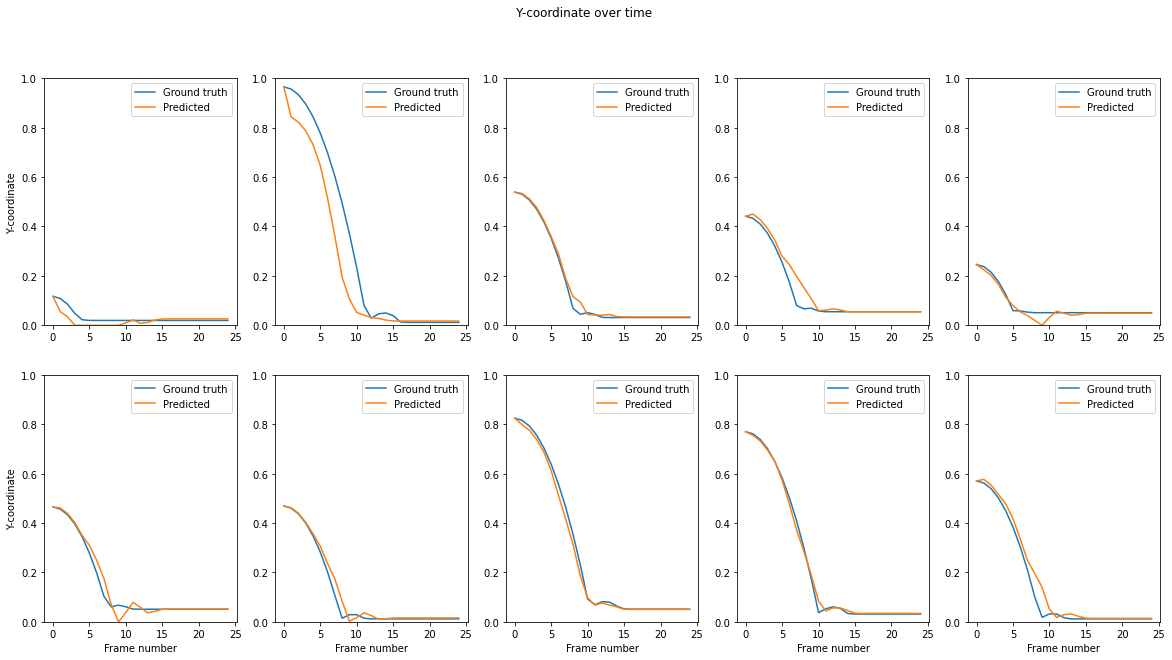

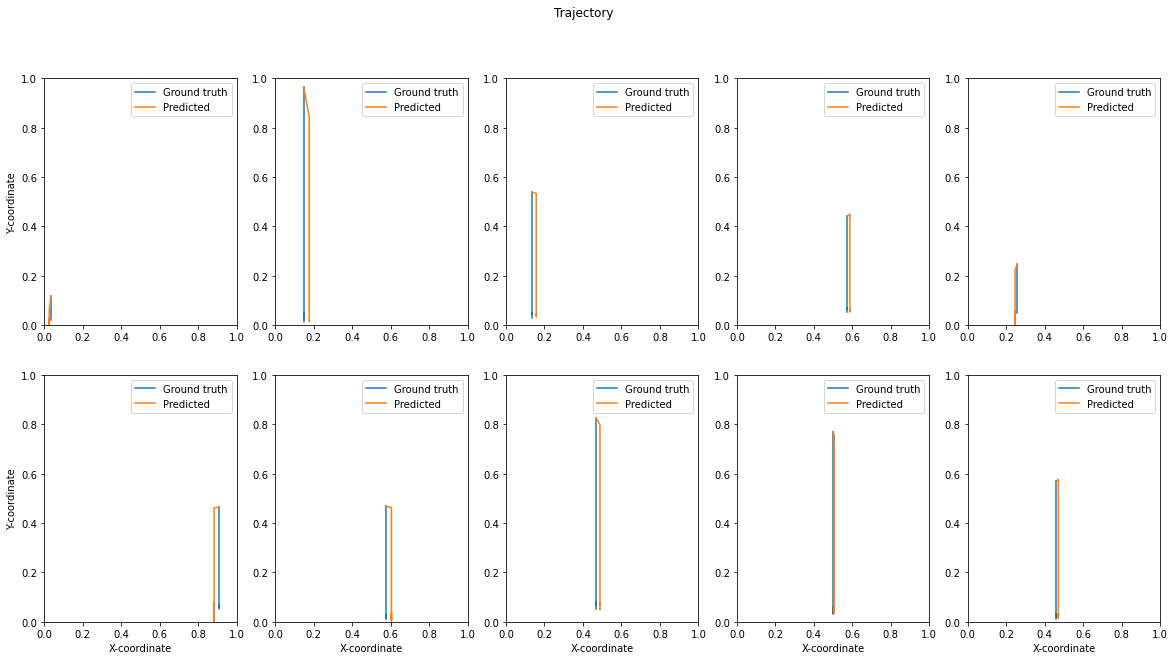

0.027971959993572222

In [8]:
rpy.set_seed(42)

grouped_esn_3_res = GroupedESN.train_model(train_dataloader=train_dataloader, input_dim=3, reservoir_size=70, output_dim=48, leaking_rate=0.7, spectral_radius=0.95, ridge_param=0.01, number_of_reservoirs=3)
GroupedESN.calculate_loss(grouped_esn_3_res, mse_esn, test_dataloader, test_data, visualize_first_10_trajectories=True)